In [77]:
# Import of necessary liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
# Datasets used for that study

house_df = pd.read_excel('/data/notebook_files/datasets/house.xls')
irates_df = pd.read_csv('/data/notebook_files/datasets/BOE.csv')

In [79]:
irates_df

,Date Changed,Rate
0,15 Dec 22,3.50
1,03 Nov 22,3.00
2,22 Sep 22,2.25
3,04 Aug 22,1.75
4,16 Jun 22,1.25
...,...,...
242,10 Mar 75,10.25
243,17 Feb 75,10.50
244,10 Feb 75,10.75
245,27 Jan 75,11.00


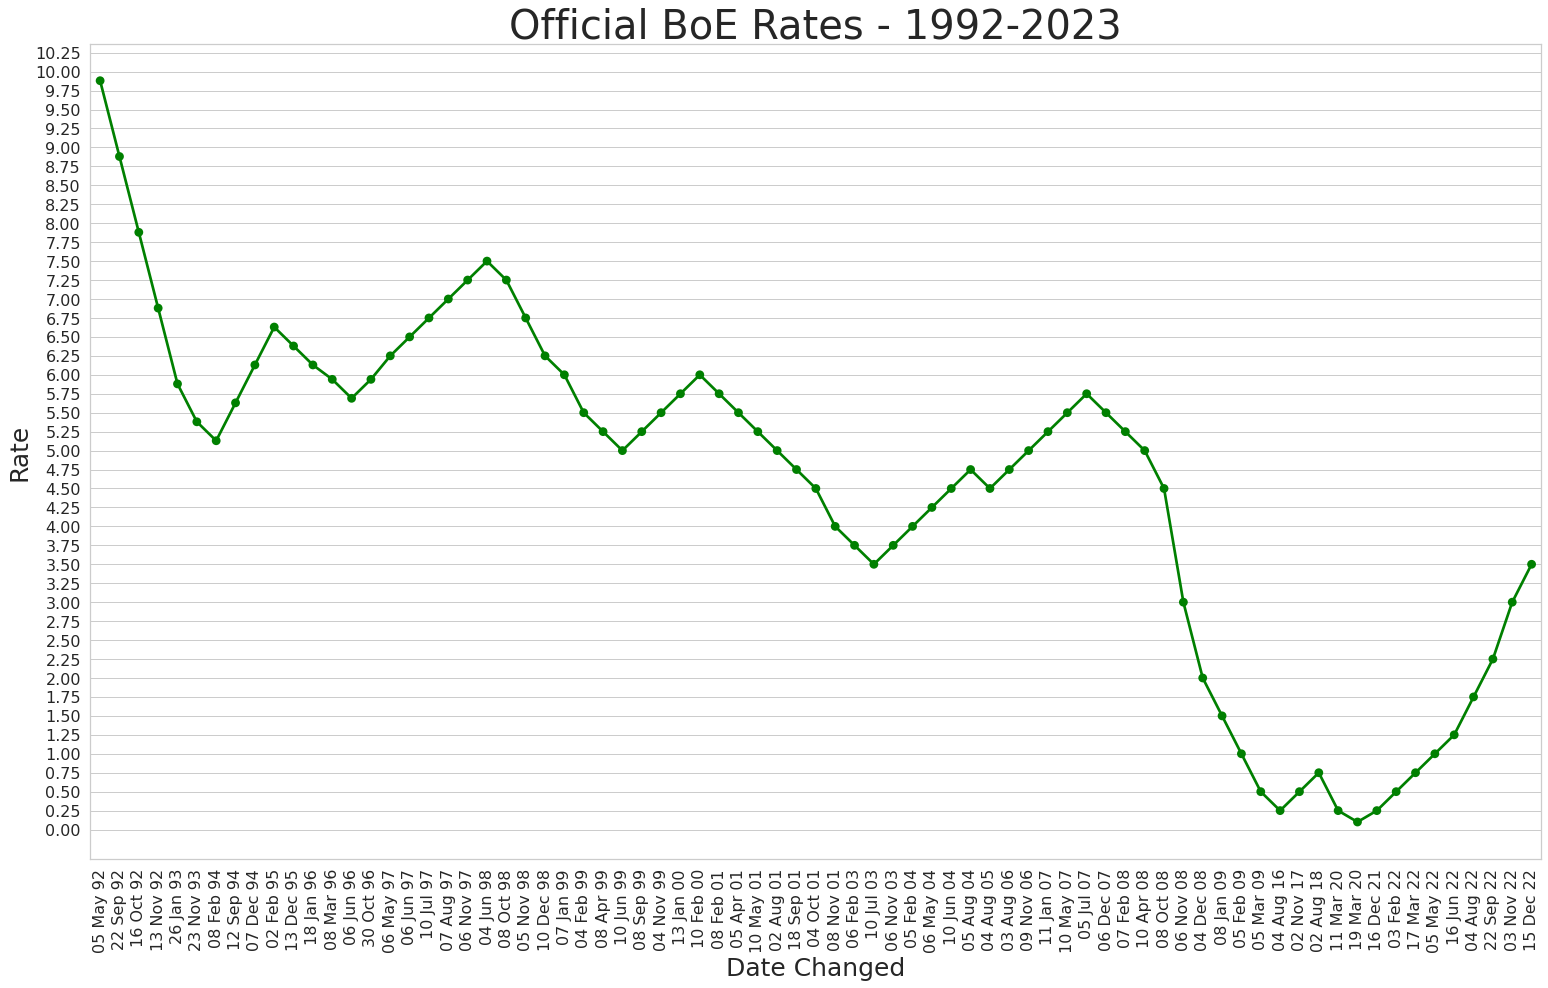

In [80]:
# Imported for further study, data not used


irates_df = irates_df.loc[0:74].sort_index(ascending=False)

rates_g = plt.figure(figsize=(26,15), facecolor='white')
rates_g_title = plt.title("Official BoE Rates - 1992-2023", size=40)
rates_gxl = plt.xlabel("Year", fontsize=25, )
rates_gyl = plt.ylabel("Rate (%)", fontsize=25)
rates_gyt = plt.yticks(np.arange(0,11, step=0.25), fontsize=16)
rates_gxt = plt.xticks(rotation=90, fontsize=16)
rates_g_theme = sns.set_theme(style="whitegrid")
rates_g_plot = sns.pointplot(data= irates_df ,x="Date Changed",y="Rate",color='Green')

plt.show()

In [81]:
house_df

,"Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,New dwellings,NaN,Other dwellings4,NaN,All dwellings,NaN,First time buyers,NaN,Former owner occupiers
2,NaN,NaN,NaN,NaN,Price,NaN,Price,NaN,Price,NaN,Price,NaN,Price
3,NaN,NaN,NaN,NaN,£,NaN,£,NaN,£,NaN,£,NaN,£
4,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029,Contact:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Source: Regulated Mortgage Survey
2030,Telephone: 01633 456400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Checking columns for empty rows

print("Missing values distribution:")
print(house_df.isnull().mean())
print("")

Missing values distribution:
Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and  region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)    0.980807
Unnamed: 1                                                                                                                                                                            0.753937
Unnamed: 2                                                                                                                                                                            0.031496
Unnamed: 3                                                                                                                                                                            1.000000
Unnamed: 4                                                                                                                                                                            0.037894
Unnamed: 5      

In [83]:
house_df3 = house_df.rename (columns=
{'Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and  region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)' : 'Region',
 'Unnamed: 1': 'Year',  
 'Unnamed: 2' : 'Quarter',
 'Unnamed: 4' : 'New dwellings',
 'Unnamed: 6' : 'Other dwellings',
 'Unnamed: 8' : 'All dwellings',
 'Unnamed: 10' : 'First time buyers',
 'Unnamed: 12' : 'Former owner occupiers',
 })

house_df3 = house_df3.assign(Region=house_df3['Region'].shift(3))
house_df3['Year'] = house_df3['Year'].interpolate(method='pad', limit=3)

column_names = ('Year','New dwellings','Other dwellings','All dwellings','First time buyers','Former owner occupiers')

def covert_to_int(dataframe,name):
        return pd.to_numeric(dataframe[name],errors='coerce').fillna(0).astype(int)
        
for value in column_names:
    house_df3[value]=covert_to_int(house_df3,value)

house_df3.drop(columns=['Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 9','Unnamed: 11'], inplace=True)
house_df3.drop(np.r_[0:7,2019:2032], inplace=True)

columns = ['Region','Year','New dwellings','Other dwellings','All dwellings','First time buyers','Former owner occupiers' ]

for column in columns:
    house_df3[column] = house_df3[column].fillna("")
    
    
house_df3

,Region,Year,Quarter,New dwellings,Other dwellings,All dwellings,First time buyers,Former owner occupiers
7,United Kingdom,1992,Q2,77360,60210,62255,46919,76988
8,K02000001,1992,Q3,69893,62513,63712,48578,79493
9,,1992,Q4,70043,57193,59230,44831,76992
10,,1993,Q1,72700,58345,60213,46300,77787
11,,1993,Q2,73289,60196,61895,48566,78151
...,...,...,...,...,...,...,...,...
2014,,2021,Q3,202498,174913,179935,150733,220168
2015,,2021,Q4,197388,165070,171830,148031,215325
2016,,2022,Q1,215044,178526,184707,151759,239818
2017,,2022,Q2,225815,182400,190623,157540,246209


In [84]:
#Creating dataframe for each area ( 15 in total):
#4 
house_df_United_Kingdom = house_df3.loc[0:128]
house_df_Great_Britain = house_df3.loc[133:254]
house_df_England_Wales = house_df3.loc[259:380]
house_df_England = house_df3.loc[385:506]
#11
#Regions:
house_df_North_East = house_df3.loc[511:632]
house_df_Yorkshire = house_df3.loc[763:884]
house_df_East_Midlands = house_df3.loc[889:1010]
house_df_West_Midlands = house_df3.loc[1015:1136]
house_df_East_England = house_df3.loc[1141:1262]
house_df_London = house_df3.loc[1267:1388]
house_df_South_East = house_df3.loc[1393:1514]
house_df_South_West = house_df3.loc[1519:1640]
house_df_Wales = house_df3.loc[1645:1766]
house_df_Scotland = house_df3.loc[1771:1892]
house_df_N_Ireland = house_df3.loc[1897:2018]

In [85]:
def average_price(df, col):
    return df[col].mean() 


def median_price(df, col):
    return df[col].median()



def lowest_price_info(df, coll, col1, col2):
    min_price = df[coll].min()
    column1 = df.loc[df[coll] == min_price, col1].iloc[0]
    column2 = df.loc[df[coll] == min_price, col2].iloc[0]
    return column1, column2, min_price


def highest_price_info(df, colh, col3, col4):
    max_price = df[colh].max()
    column3 = df.loc[df[colh] == max_price, col3].iloc[0]
    column4 = df.loc[df[colh] == max_price, col4].iloc[0]
    return column3, column4, max_price


class Country:
    def __init__ (self, database, name):
        self.database = database
        self.name = name
                 
    

                
countries = [Country(house_df_United_Kingdom,'1.United Kingdom'),
             Country(house_df_Great_Britain,'2.Great Britain'),
             Country(house_df_England_Wales,'3.England Wales'),
             Country(house_df_England,'4.England'),
             Country(house_df_North_East,'5.North East'),
             Country(house_df_Yorkshire,'6.Yorkshire'),
             Country(house_df_East_Midlands,'7.East Midlands'),
             Country(house_df_West_Midlands,'8.West Midlands'),
             Country(house_df_East_England,'9.East England'),
             Country(house_df_London,'10.London'), 
             Country(house_df_South_East,'11.South East'),
             Country(house_df_South_West,'12.South West'),
             Country(house_df_Wales,'13.Wales'),
             Country(house_df_Scotland,'14.Scotland'),
             Country(house_df_N_Ireland,'15.Northen Ireland'),
             
]
             
    
# print("Peak change in nominal simple average values \nof the properties within 30 years period (1992-2022):\n")



# for country in countries:
#     print("-----------------------------------------------")
#     print(country.name)
#     col1, col2, min_price = lowest_price_info(country.database,'All dwellings','Year','Quarter')
#     col3, col4, max_price = highest_price_info(country.database,'All dwellings','Year','Quarter')
#     print('Lowest average price: ',min_price,"GBP", (col2, col1)) 
#     print('Highest average price: ', max_price,"GBP", (col4, col3))
    
#     Difference = max_price - min_price
#     Percent = int(Difference/min_price*100)
#     print("Price difference:", Difference, Percent,"%")
#     print('Average price: ', average_price(country.database,'All dwellings'))
#     print('Median price: ', median_price(country.database,'All dwellings'))
    


print("Peak change in nominal simple average values \nof the properties within 30 years period (1992-2022):\n")

results = []

for country in countries:
    country_result = {'Country': country.name}
    col1, col2, min_price = lowest_price_info(country.database,'All dwellings','Year','Quarter')
    col3, col4, max_price = highest_price_info(country.database,'All dwellings','Year','Quarter')
    country_result['Lowest average price GBP'] =  min_price
    country_result['LAP Quarter'] = col2
    country_result['LAP Year'] = col1
    country_result['Highest average price GBP'] = max_price
    country_result['HAP Quarter'] = col4
    country_result['HAP Year'] = col3
    Difference = max_price - min_price
    Percent = int(Difference/min_price*100)
    country_result['Price Difference'] = Difference
    country_result['Percent change'] = Percent
    country_result['Average Price'] = int(average_price(country.database,'All dwellings'))
    country_result['Median Price'] = int(median_price(country.database,'All dwellings'))
    results.append(country_result)


  
column_names = ['Country', 'Lowest average price GBP','LAP Quarter','LAP Year', 'Highest average price GBP','HAP Quarter','HAP Year','Price Difference','Percent change','Average Price', 'Median Price']
Results_df = pd.DataFrame(results, columns=column_names)

Results_df

Peak change in nominal simple average values 
of the properties within 30 years period (1992-2022):



,Country,Lowest average price GBP,LAP Quarter,LAP Year,Highest average price GBP,HAP Quarter,HAP Year,Price Difference,Percent change,Average Price,Median Price
0,1.United Kingdom,59230,Q4,1992,353532,Q3,2022,294302,496,191779,217170
1,2.Great Britain,59796,Q4,1992,357364,Q3,2022,297568,497,193177,217452
2,3.England Wales,60818,Q4,1992,368861,Q3,2022,308043,506,198227,222502
3,4.England,61333,Q4,1992,374920,Q3,2022,313587,511,201470,225381
4,5.North East,43496,Q1,1995,204192,Q3,2022,160696,369,122166,149376
5,6.Yorkshire,48262,Q4,1992,244449,Q3,2022,196187,406,138285,166584
6,7.East Midlands,51358,Q1,1995,278443,Q3,2022,227085,442,148646,170973
7,8.West Midlands,56145,Q2,1993,286347,Q3,2022,230202,410,157524,181680
8,9.East England,63217,Q4,1992,409984,Q3,2022,346767,548,213202,230964
9,10.London,76040,Q4,1992,638125,Q3,2022,562085,739,323030,330103


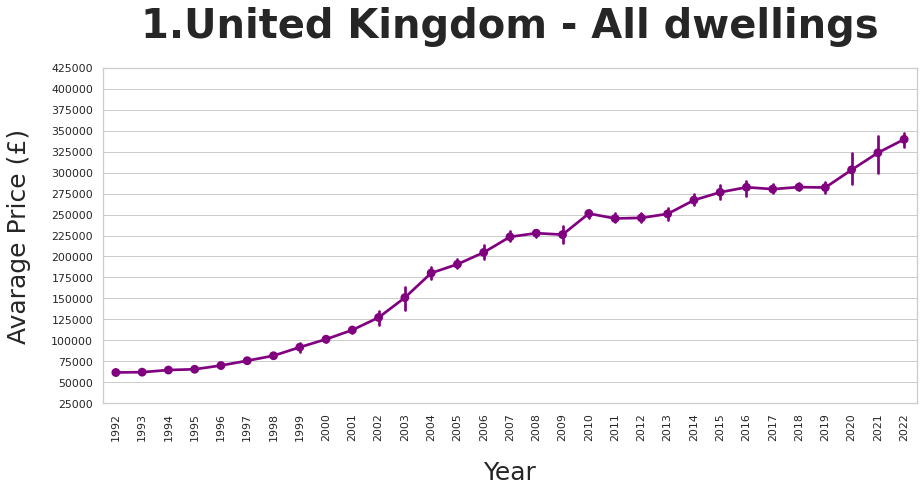

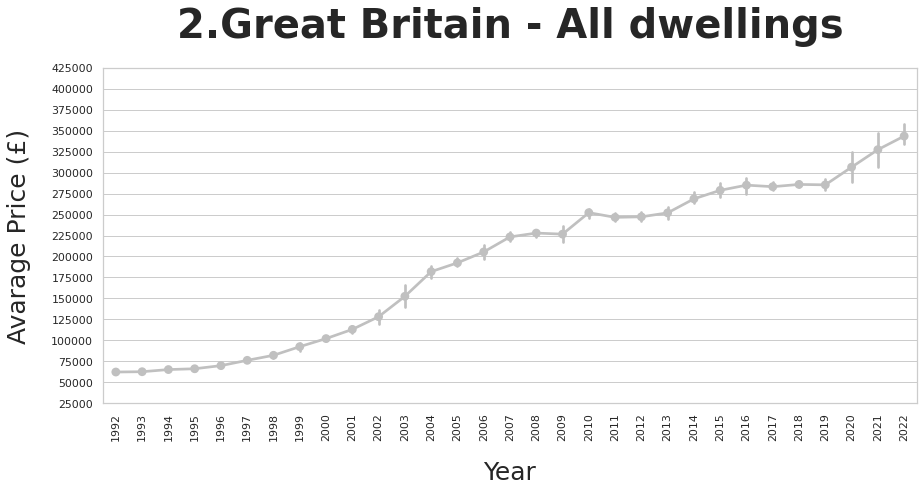

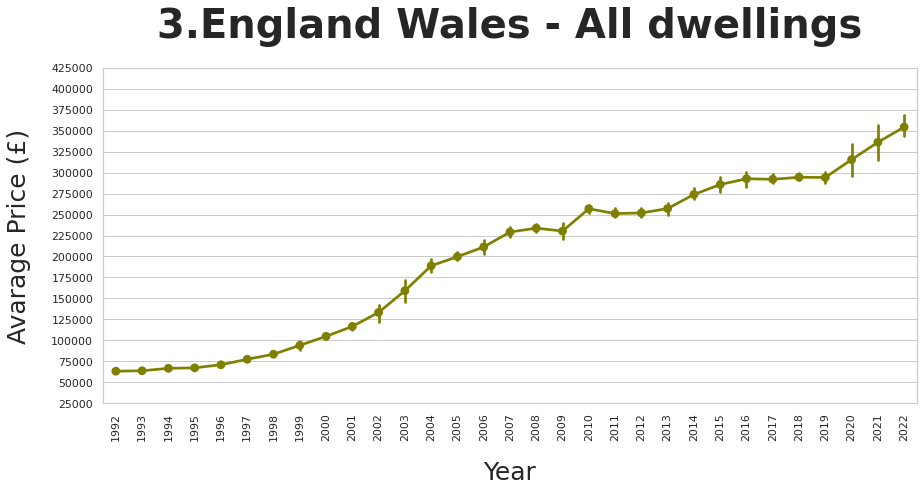

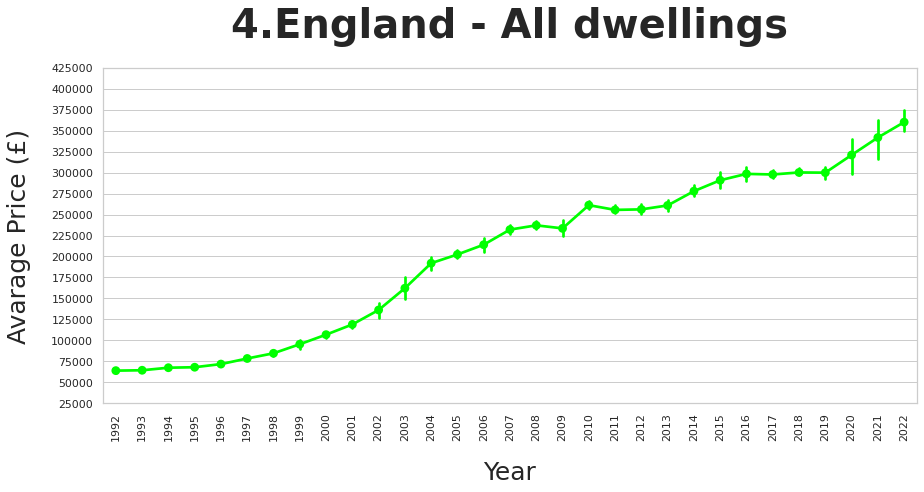

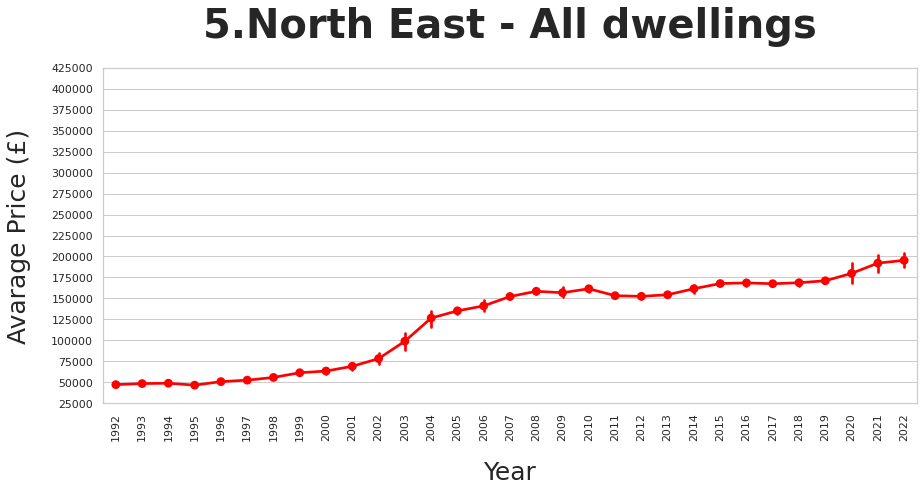

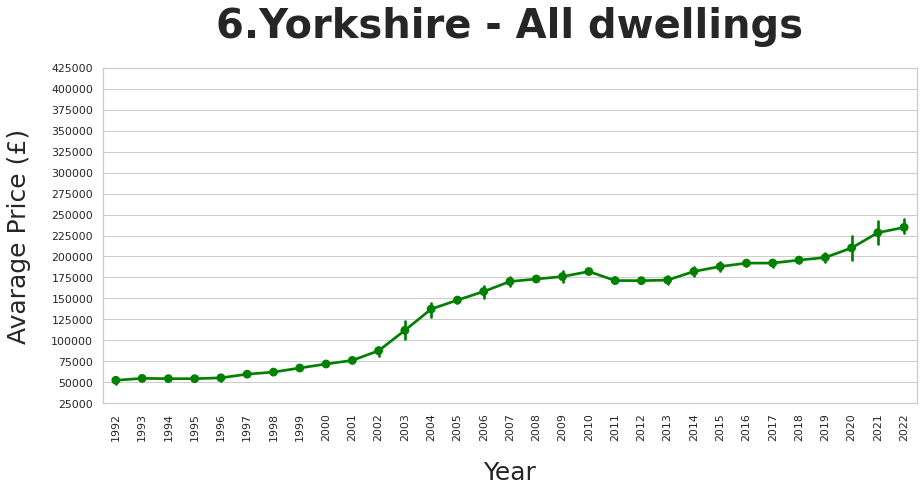

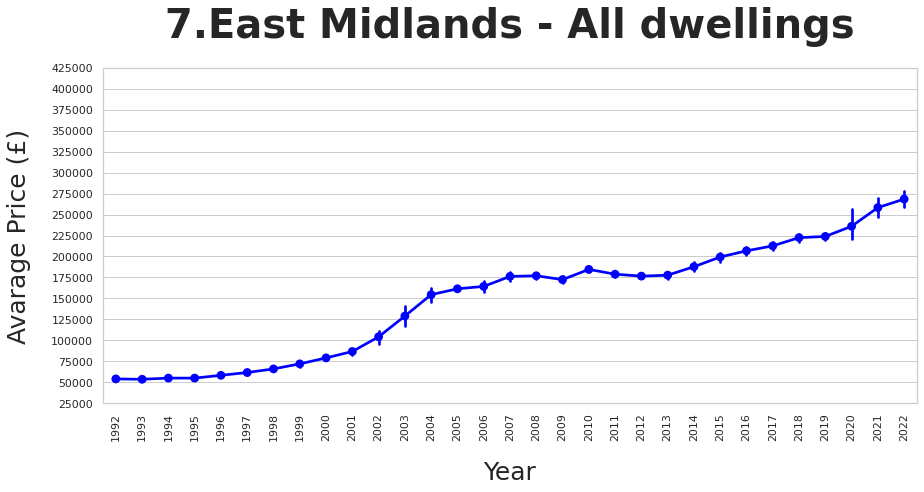

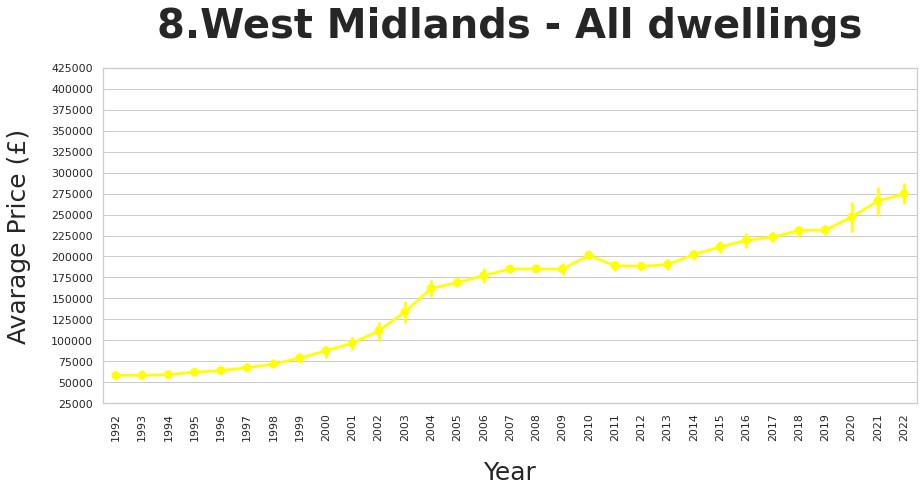

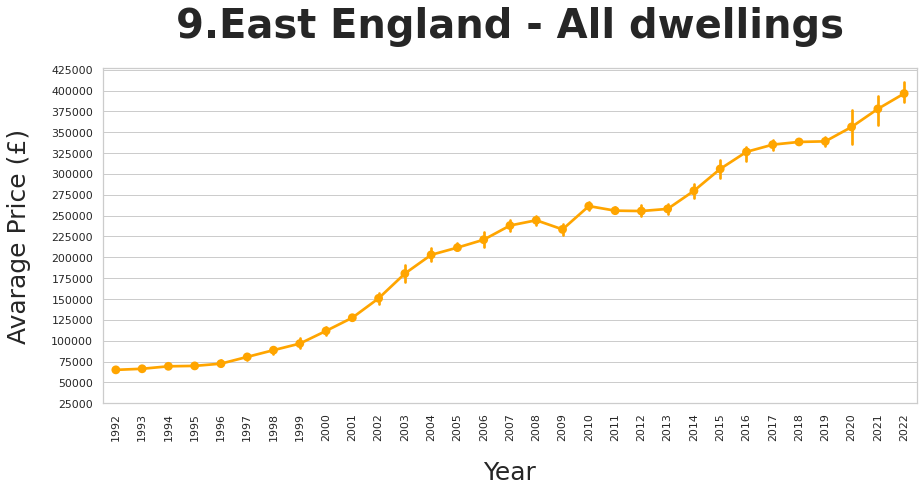

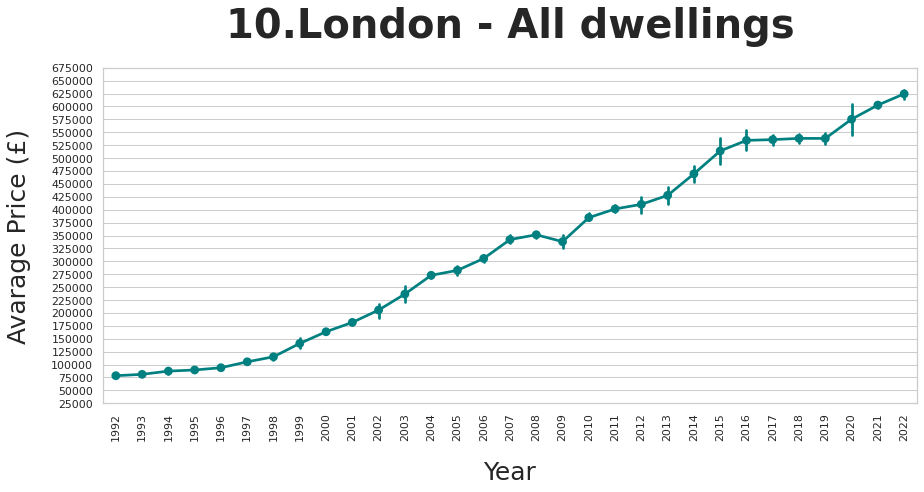

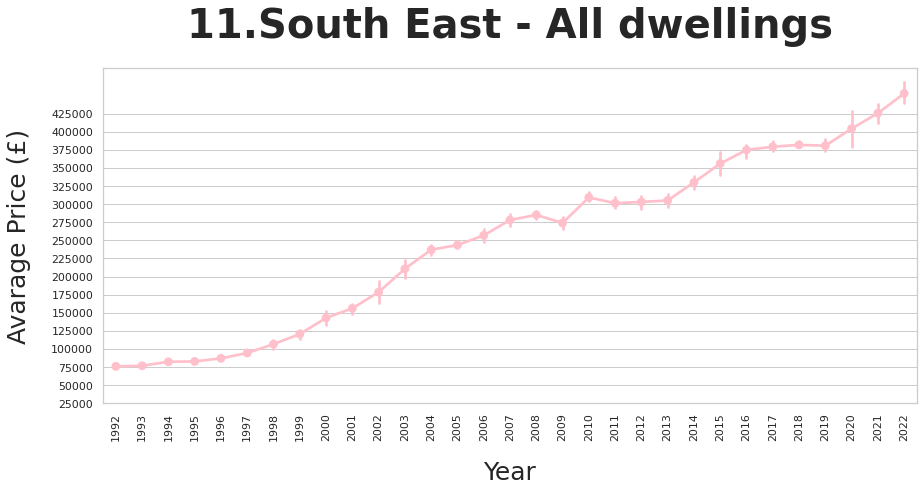

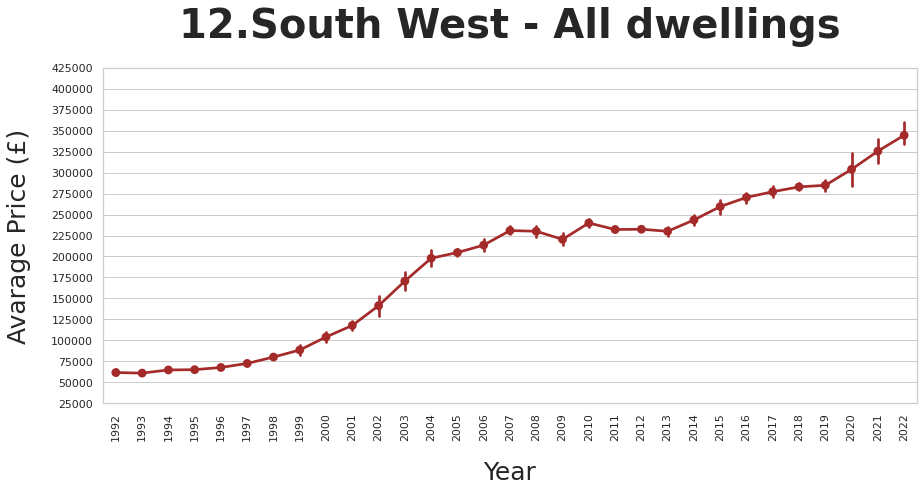

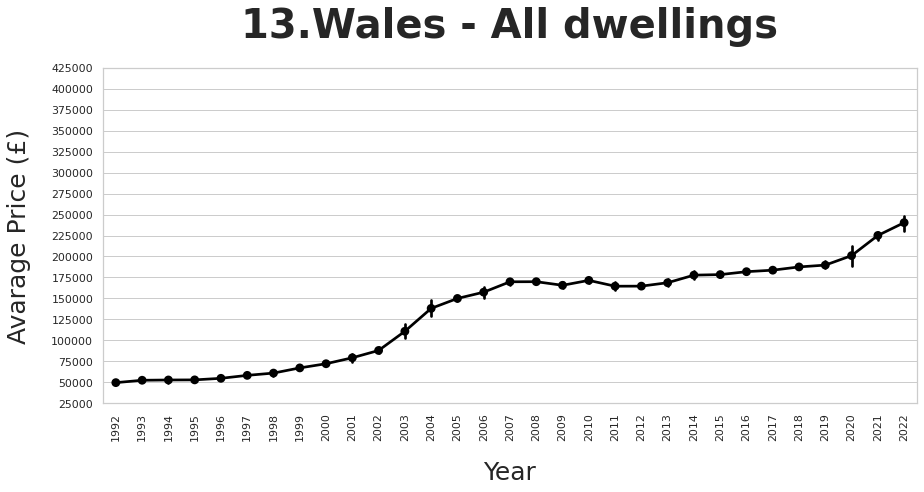

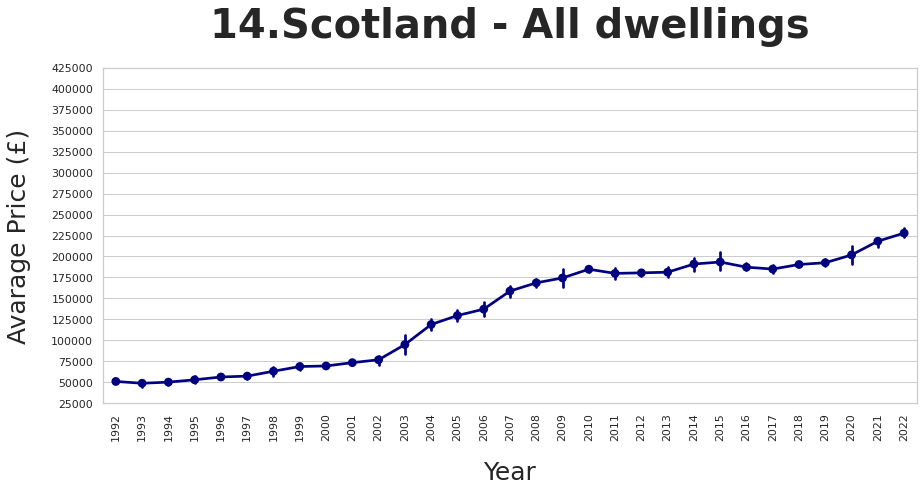

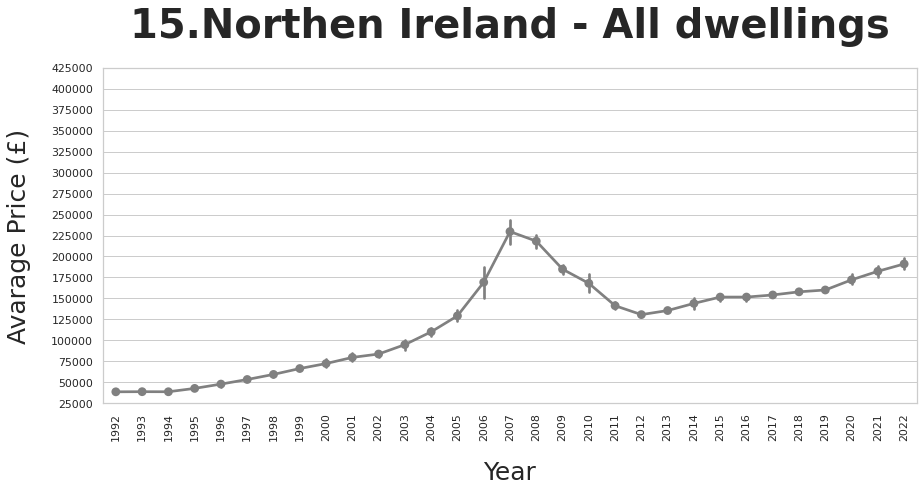

In [86]:
colors = ["Purple", "Silver","Olive", "Lime","Red", 
          "Green", "Blue", "Yellow","Orange", "Teal", "Pink", "Brown", "Black", "Navy", "Gray"]



def show_graph(dataframe,name,color,ymax=None):
    default_ymax = 450000
    if ymax is not None:
        default_ymax=ymax
    plt.figure(num=1,figsize=(13,7), layout='tight',facecolor='white')
    sns.set_theme(style="whitegrid")
    sns.pointplot(data=dataframe, x='Year', y='All dwellings', color=color)
    plt.title('%s - All dwellings'% name, size=40,pad=30, weight='heavy')
    plt.xlabel("Year", fontsize=25, labelpad=20)
    plt.xticks(rotation=90)
    plt.ylabel("Avarage Price (£)", fontsize=25,labelpad=20)
    plt.yticks(np.arange(25000,default_ymax, step=25000))
    plt.show()
    
    
for (color, country) in zip(colors,countries):
    if country.name == '10.London':
        show_graph(country.database,country.name,color,700000)
    else: 
        show_graph(country.database,country.name,color)

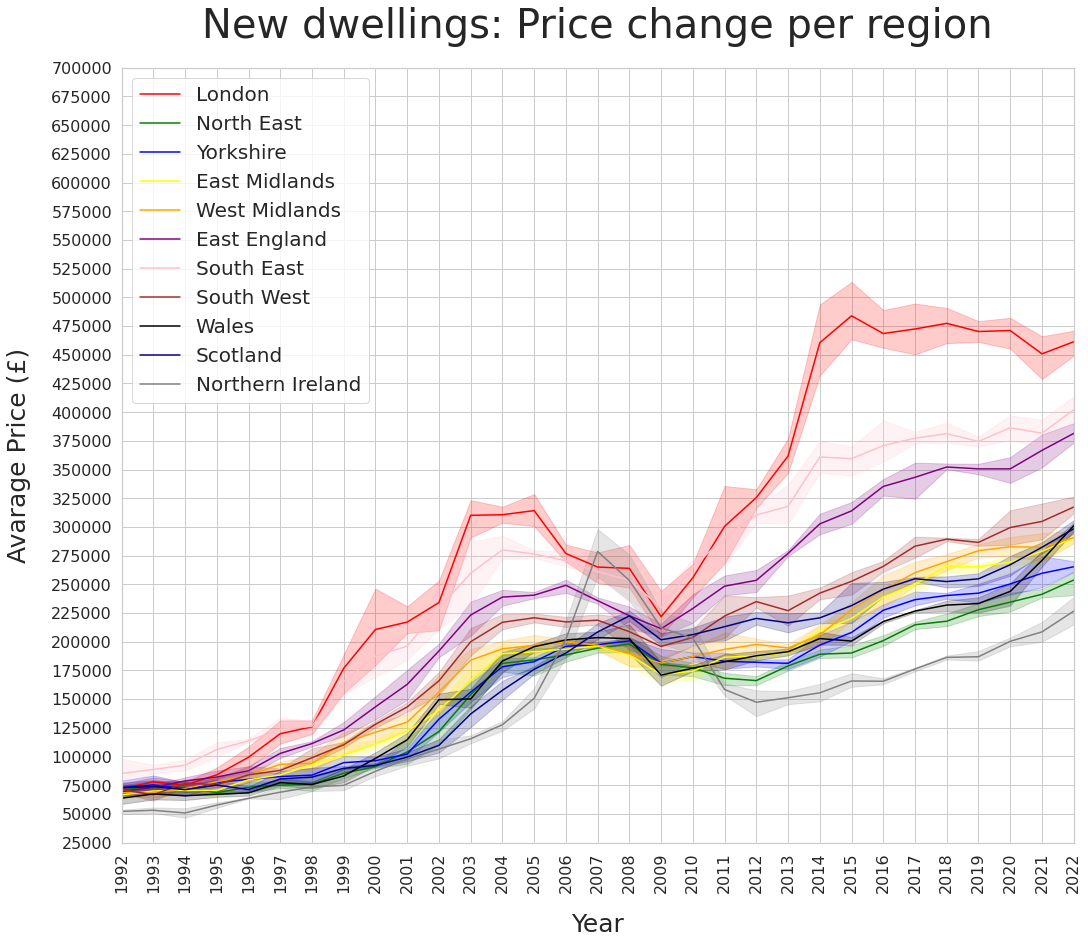

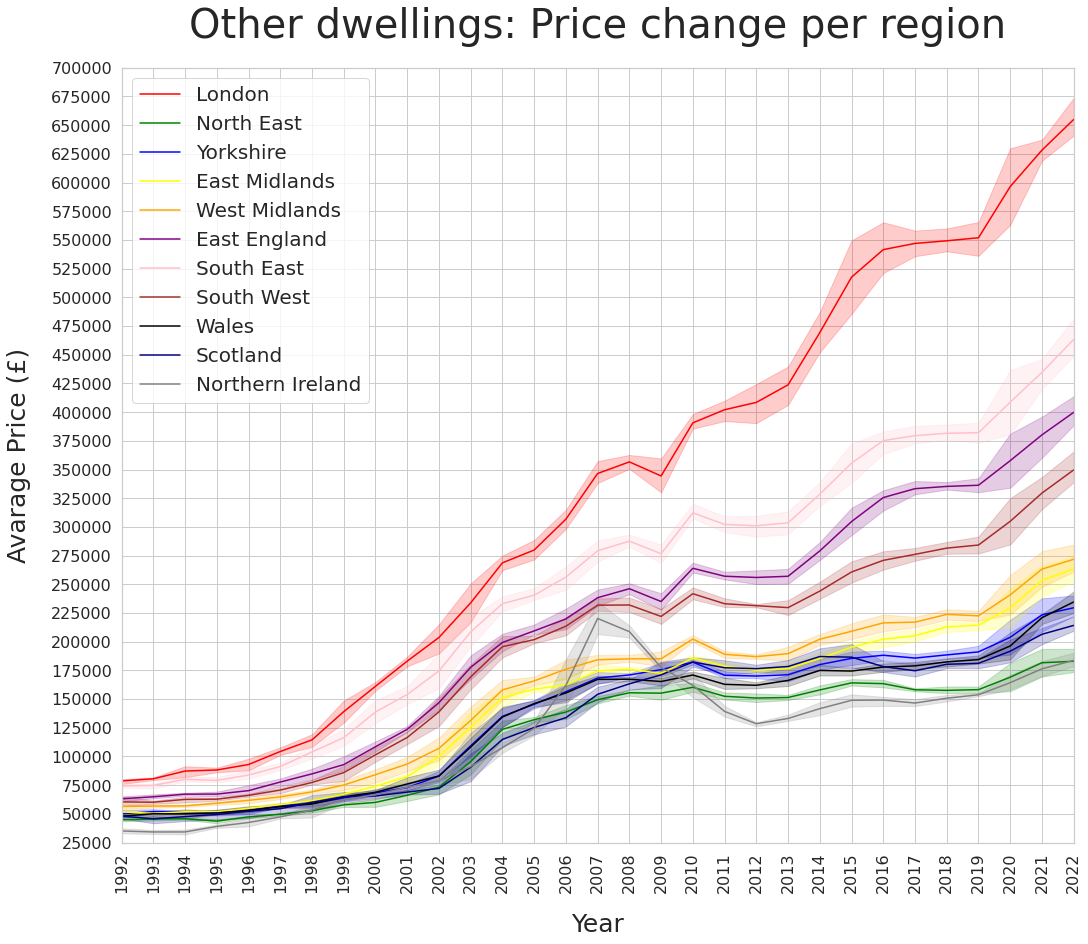

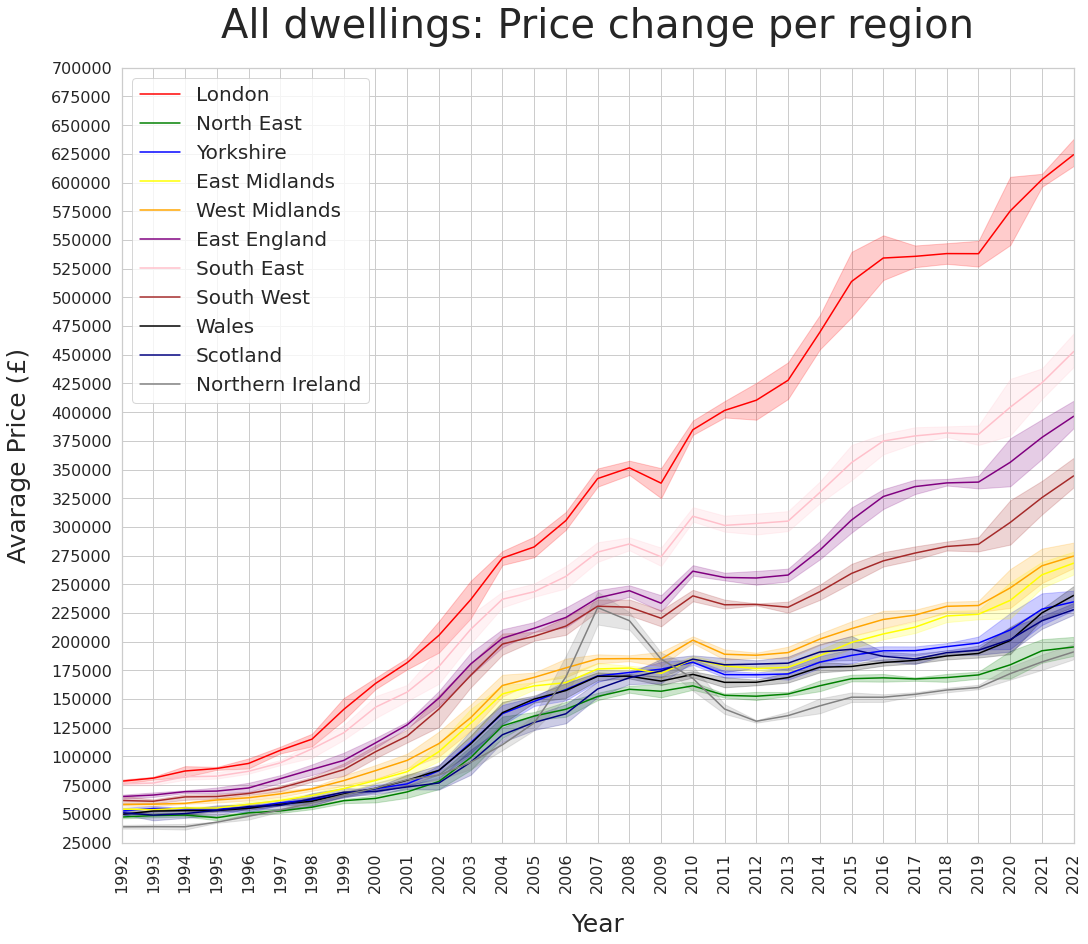

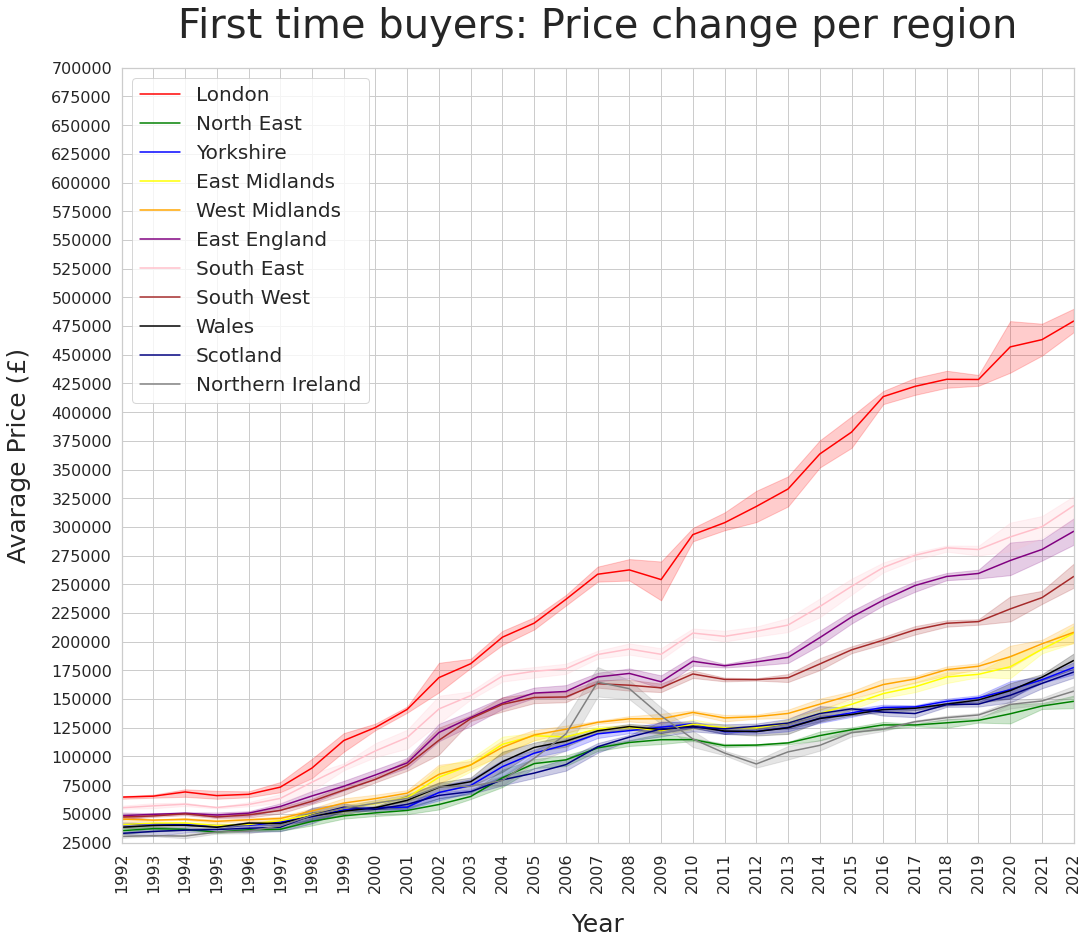

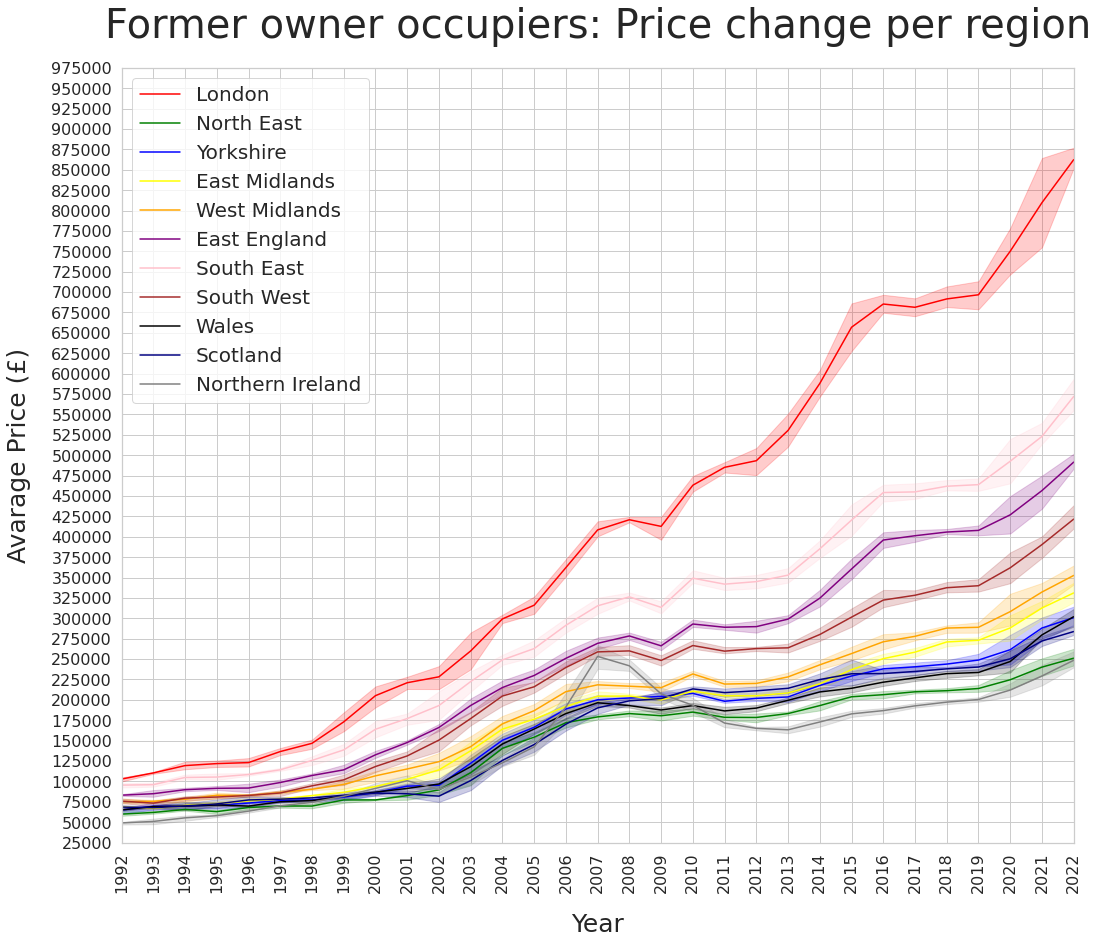

In [87]:

databases = [house_df_London,house_df_North_East,house_df_Yorkshire,house_df_East_Midlands,house_df_West_Midlands,
             house_df_East_England,house_df_South_East,house_df_South_West,house_df_Wales,house_df_Scotland,house_df_N_Ireland]
labels = ['London','North East','Yorkshire','East Midlands','West Midlands','East England','South East','South West',
         'Wales','Scotland','Northern Ireland']
colors = ["Red", "Green", "Blue", "Yellow", "Orange", "Purple", "Pink", "Brown", "Black", "Navy", "Gray"]

columns = ['New dwellings','Other dwellings','All dwellings','First time buyers','Former owner occupiers']
    
def draw_lineplot(database,label,color,column):
    sns.lineplot(data= database ,x="Year",y=column,legend='full', label=label, color=color)

  
for column in columns:
    plt.figure(figsize=(15,13), layout='constrained', facecolor='white')
    sns.set_theme(style="whitegrid")

    for (database, label, color) in zip(databases, labels, colors):
        draw_lineplot(database,label,color,column)
    
    plt.title('%s: Price change per region' % column, size=40,pad=30)
    plt.margins(x=-0.1, y=-0.1)
    plt.legend(fontsize=20)
    plt.xlabel("Year", fontsize=25, labelpad=20)
    plt.xticks(np.arange(1992,2023,step=1), rotation=90, fontsize=16)
    plt.ylabel("Avarage Price (£)", fontsize=25,labelpad=20)
    if column == 'Former owner occupiers':
        plt.yticks(np.arange(25000,1000000, step=25000), fontsize=16)
    else: 
        plt.yticks(np.arange(25000,725000, step=25000), fontsize=16)

    plt.show()

In [88]:
# Price finder


databases = [house_df_London,house_df_North_East,house_df_Yorkshire,house_df_East_Midlands,house_df_West_Midlands,
             house_df_East_England,house_df_South_East,house_df_South_West,house_df_Wales,
             house_df_Scotland,house_df_N_Ireland]

columns = ['New dwellings','Other dwellings','All dwellings','First time buyers','Former owner occupiers']


def get_price(df, column, year, quarter):
    value = df.query("Year == {} and Quarter == '{}'".format(year, quarter))[column].values[0]
    return value


get_price(house_df_England,'Former owner occupiers',2011,'Q2')

284643